
## Background and problem statement

This is the second post in a multi-part post.  If you missed the first post, you can get it [here](https://wcontractor.github.io/nfl-salary.html).  In part 2 of this post I'm am looking to collect all the NFL Salary cap data from the 32 teams spread over individual webpages from www.spoctrac.com and merge that into 1 large data set.  This final data set can then be used to answer questions such as:
- Who are the highest paid players in the NFL?
- Which positions are the highest paid?
- For those players that are highest paid where do they rank statistically?
- For those teams that have the highest paid positions where do they rank statistically?  Football is after all a team sport :football:
- And to be push the limits is there a correlation between the number of times a player is mentioned on twitter and their salary?

## Imports and Function definitions
Throughout this post I'm using the BeautifulSoup library to parse the webpage and the urllib library to get pages.  I have also defined 2 functions to support this.
- get_page is used to build a list of 32 URLS, 1 for each of the teams that will be used iterated over and parsed using the next function.  
- get_team_table accepts a url, opens that as a page, and then uses BeautufilSoup to parse it and return a soup object.  


In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
base_url = "http://www.spotrac.com/nfl/"

def get_page(url):
    page = urlopen(base_url)
    soup = BeautifulSoup(page, 'lxml')
    file = open("spotrac_urls.txt", 'w')
    file.write(str(soup))
    file.close()

def get_team_table(url):
    page = urlopen(url)
    soup = BeautifulSoup(page, 'lxml')

## Get all the BASE URLS
The http://www.spotrac.com/nfl/ has links for each of the 32 NFL teams.  On those pages there is a datatable that has that teams Salary cap data.  To get those links so that they can be used later used the get_page function and write the contents to a file.

In [2]:
get_page(base_url)

In [3]:
with open("spotrac_urls.txt", 'r') as file:
    for line in file:
        line = line.strip()

In [4]:
from bs4 import BeautifulSoup
page = open("spotrac_urls.txt", 'r')
soup = BeautifulSoup(page, "lxml")
div = soup.find("div","subnav-posts")

In [5]:
# This is a terribly simple regex to loop through all the div tags and find all the anchor tags.
# Then I just get the href and print them out.
import re
links = div.find_all('a')
for link in links:
    print(link.get('href'))

len(links)

http://www.spotrac.com/nfl/arizona-cardinals/cap/
http://www.spotrac.com/nfl/atlanta-falcons/cap/
http://www.spotrac.com/nfl/baltimore-ravens/cap/
http://www.spotrac.com/nfl/buffalo-bills/cap/
http://www.spotrac.com/nfl/carolina-panthers/cap/
http://www.spotrac.com/nfl/chicago-bears/cap/
http://www.spotrac.com/nfl/cincinnati-bengals/cap/
http://www.spotrac.com/nfl/cleveland-browns/cap/
http://www.spotrac.com/nfl/dallas-cowboys/cap/
http://www.spotrac.com/nfl/denver-broncos/cap/
http://www.spotrac.com/nfl/detroit-lions/cap/
http://www.spotrac.com/nfl/green-bay-packers/cap/
http://www.spotrac.com/nfl/houston-texans/cap/
http://www.spotrac.com/nfl/indianapolis-colts/cap/
http://www.spotrac.com/nfl/jacksonville-jaguars/cap/
http://www.spotrac.com/nfl/kansas-city-chiefs/cap/
http://www.spotrac.com/nfl/los-angeles-chargers/cap/
http://www.spotrac.com/nfl/los-angeles-rams/cap/
http://www.spotrac.com/nfl/miami-dolphins/cap/
http://www.spotrac.com/nfl/minnesota-vikings/cap/
http://www.spotrac.c

32

In [6]:

from urllib.request import urlopen
def get_team_table(url):
    page = urlopen(url)
    soup = BeautifulSoup(page, 'lxml')
    data_rows = [row for row in soup.find("table", "datatable").find_all("tr")]
    return data_rows


## Get the data
For all 32 teams we get the table rows using the get_team_table functions

In [7]:
# create an empty list
team_data = []

for link in links:
    team_data.append(get_team_table(link.get('href')))


In [14]:
#Make sure there are 32 elements in team_data
len(team_data)


32

## The heavy lifting
Build player_data from the combined table rows that were parsed from all the links above.  This takes some time to execute.  

In [15]:
#data_rows = [row for row in soup.find("td", "center").find_all("tr")]
table_data = []

#soup = BeautifulSoup(team_data[0], 'lxml')

#This needs to be a nested for loop because inner items of the list are BeautifulSoup Elements
for row in team_data:
    for element in row:
        #print(type(element))
        if soup.find_all("td", attrs={"class":" right xs-hide "}) is not None:
            table_data.append(element.get_text())

player_data = []
for row in table_data:
    player_data.append(row.split("\n"))
    #print(player_data)

len(player_data)    


1725

## Loada DataFrame and reshape the data
In the next cells I load the data into a DataFrame and reshape it so that it has 12 columns, fix the header, and remove the invalid rows

In [16]:
import pandas as pd
df = pd.DataFrame(player_data)
df = df.drop(14, 1)
df = df.drop(0, 1)
df = df.drop(1, 1)


df = df.drop(df.index[[0]])
#df.set_index(1, inplace=True)
print(df.shape)
df.head()


(1724, 12)


,2,3,4,5,6,7,8,9,10,11,12,13
1,Larry Fitzgerald,WR,"$11,000,000","$2,500,000",-,-,-,"$2,350,000",-,-,"$15,850,000",9.44
2,Patrick Peterson,CB,"$9,750,000","$3,072,377",-,-,"$250,000","$634,588",-,"($18,048,518)","$13,706,965",8.16
3,Chandler Jones,OLB,"$7,000,000","$3,000,000",-,-,-,-,-,"($31,000,000)","$10,000,000",5.96
4,Jared Veldheer,RT,"$6,500,000","$1,250,000","$250,000",-,-,"$2,000,000",-,"($6,500,000)","$10,000,000",5.96
5,Tyrann Mathieu,FS,"$4,750,000","$3,100,000",-,-,"$250,000",-,-,"($17,400,000)","$8,100,000",4.82


In [17]:
players = []
for row in team_data[0]:
    if row.get_text("tr") is not None:
        players.append(row) 

column_headers = [col.get_text() for col in players[0].find_all("th") if col.get_text()]
len(column_headers)

12

In [18]:
df.columns = column_headers
df.head()

,Active Players (53),Pos.,Base Salary,Signing Bonus,Roster Bonus,Option Bonus,Workout Bonus,Restruc. Bonus,Misc.,Dead Cap,Cap Hit,Cap %
1,Larry Fitzgerald,WR,"$11,000,000","$2,500,000",-,-,-,"$2,350,000",-,-,"$15,850,000",9.44
2,Patrick Peterson,CB,"$9,750,000","$3,072,377",-,-,"$250,000","$634,588",-,"($18,048,518)","$13,706,965",8.16
3,Chandler Jones,OLB,"$7,000,000","$3,000,000",-,-,-,-,-,"($31,000,000)","$10,000,000",5.96
4,Jared Veldheer,RT,"$6,500,000","$1,250,000","$250,000",-,-,"$2,000,000",-,"($6,500,000)","$10,000,000",5.96
5,Tyrann Mathieu,FS,"$4,750,000","$3,100,000",-,-,"$250,000",-,-,"($17,400,000)","$8,100,000",4.82


In [19]:
#The header repeated itself in the data.  This didn't reveal itself until the data type conversion step below
#but this fixes all occurrences of it.
rows_to_be_dropped = df.loc[df['Cap Hit'] == 'Cap %'].index
df = df.drop(rows_to_be_dropped)


In [20]:
#Apply a regex to convert the 'Cap Hit' column from a string to a float.  
df['Cap Hit'] =(df['Cap Hit'].replace('[\$,)]', "", regex=True).replace( '[(]','-',   regex=True ).astype(float))

#Sanity check to make sure it worked.
df['Cap Hit'].sum()

4159332264.0

In [25]:
df.shape
#53*32 = 1696 there should be this many rows in the data set, how did I end up with 3 extra??
#That's such an odd number?

(1693, 13)

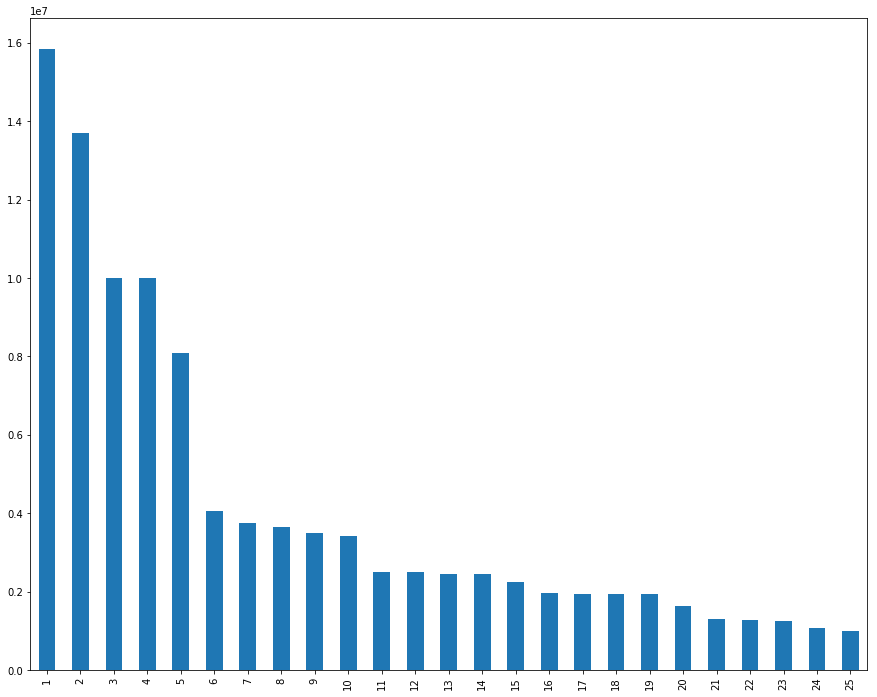

In [22]:
import matplotlib.pyplot as plt
df['Cap Hit'].head(25).plot(kind="bar",figsize=(15,12))
plt.show()

In [23]:
df['Cap Average By Game'] = df['Cap Hit']/16

In [24]:
df.head(25)
#Assuming 16 games & all his bunuses - Larry Fitzgerald makes $9.9M a game!!

,Active Players (53),Pos.,Base Salary,Signing Bonus,Roster Bonus,Option Bonus,Workout Bonus,Restruc. Bonus,Misc.,Dead Cap,Cap Hit,Cap %,Cap Average By Game
1,Larry Fitzgerald,WR,"$11,000,000","$2,500,000",-,-,-,"$2,350,000",-,-,15850000.0,9.44,990625.0000
2,Patrick Peterson,CB,"$9,750,000","$3,072,377",-,-,"$250,000","$634,588",-,"($18,048,518)",13706965.0,8.16,856685.3125
3,Chandler Jones,OLB,"$7,000,000","$3,000,000",-,-,-,-,-,"($31,000,000)",10000000.0,5.96,625000.0000
4,Jared Veldheer,RT,"$6,500,000","$1,250,000","$250,000",-,-,"$2,000,000",-,"($6,500,000)",10000000.0,5.96,625000.0000
5,Tyrann Mathieu,FS,"$4,750,000","$3,100,000",-,-,"$250,000",-,-,"($17,400,000)",8100000.0,4.82,506250.0000
6,Drew Stanton,QB,"$2,550,000","$1,000,000","$500,000",-,-,-,-,"($3,550,000)",4050000.0,2.41,253125.0000
7,Jermaine Gresham,TE,"$2,000,000","$1,750,000",-,-,-,-,-,"($13,000,000)",3750000.0,2.23,234375.0000
8,Corey Peters,DT,"$2,750,000","$666,668","$93,750",-,"$150,000",-,-,"($3,566,668)",3660418.0,2.18,228776.1250
9,Justin Bethel,CB,"$2,000,000","$1,500,000",-,-,-,-,-,"($3,500,000)",3500000.0,2.08,218750.0000
10,Antoine Bethea,SS,"$2,000,000","$666,666","$500,000",-,"$250,000",-,-,"($4,250,000)",3416666.0,2.04,213541.6250
